In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.668464,#VALUE!,#VALUE!,0.567248,0.506609,0.655030,0.636979,0.536181,0.506654,0.518761,0.496152,0.459147,0.449182,0.353947,0.357103,0.329711,0.304403,4
1,1997-02-28 00:00:00,0.624202,#VALUE!,#VALUE!,0.680081,0.668988,0.563555,0.562441,0.449556,0.436823,0.418170,0.399000,0.432388,0.428415,0.347527,0.347865,0.350774,0.343032,4
2,1997-03-31 00:00:00,0.636686,#VALUE!,#VALUE!,0.502622,0.568925,0.479497,0.450737,0.450872,0.413733,0.399141,0.374429,0.405359,0.388403,0.373381,0.367970,0.286711,0.279589,4
3,1997-04-30 00:00:00,0.671868,#VALUE!,#VALUE!,0.427443,0.382158,0.399787,0.374874,0.405612,0.390073,0.368219,0.351346,0.356374,0.340721,0.337753,0.348024,0.255888,0.283248,4
4,1997-05-31 00:00:00,0.653710,#VALUE!,#VALUE!,0.551612,0.482485,0.356650,0.347836,0.343839,0.322845,0.385693,0.368022,0.375736,0.351954,0.371183,0.374078,0.293054,0.312884,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               240 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.63129521925


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.726363,0.462733,0.463937,0.459782,0.446456,0.468864,0.453503,0.472639,0.468094,0.468662,0.458421,0.480487,0.477430,2.950000
std,0.087563,0.286872,0.283242,0.307265,0.298437,0.287572,0.280598,0.274206,0.276618,0.248151,0.247743,0.190650,0.188811,1.032112
min,0.632146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.110442,1.000000
25%,0.658817,0.258909,0.294854,0.250302,0.267065,0.323012,0.350291,0.343324,0.354506,0.372115,0.360323,0.388140,0.365064,2.000000
50%,0.696836,0.445823,0.432338,0.459952,0.409702,0.473566,0.436712,0.440579,0.444454,0.432172,0.411079,0.458818,0.448932,3.000000
75%,0.790183,0.660763,0.648886,0.654021,0.588639,0.629940,0.542668,0.655679,0.569682,0.572860,0.509672,0.515875,0.479782,4.000000
max,0.968081,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 3-mo (Treasury)   60.0  0.462733  0.286872  0.037035   
 2                         combined  120.0  0.594548  0.249248  0.022753   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.388626  0.536840  
 2   0.549495  0.639601  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2636
 1                              Degrees of freedom =   118.0000
 2                                               t =     6.8083
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2430
 7                                       Hedge's g =     1.2351
 8           

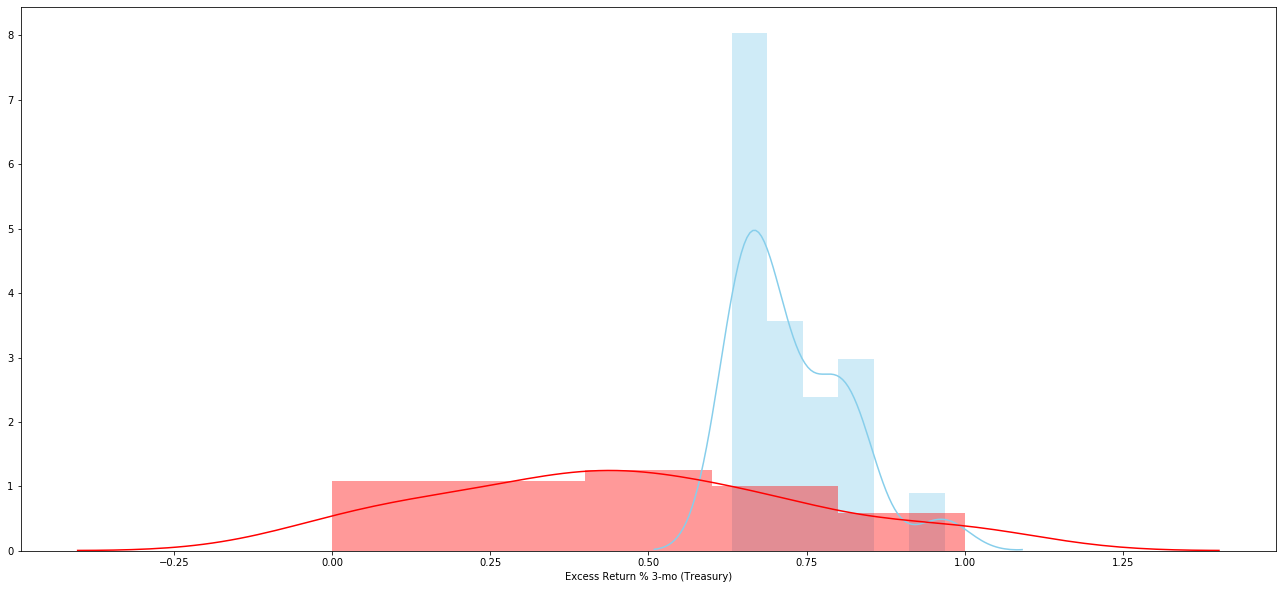

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   60.0  0.726363  0.087563  0.011304   0.703743   
 1  Excess Return % 3-mo (Agg)   60.0  0.463937  0.283242  0.036566   0.390768   
 2                    combined  120.0  0.595150  0.246858  0.022535   0.550528   
 
    Interval  
 0  0.748983  
 1  0.537106  
 2  0.639771  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2624
 1                             Degrees of freedom =   118.0000
 2                                              t =     6.8565
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2518
 7                                      Hedge's g =     1.2439
 8                                  Glass'

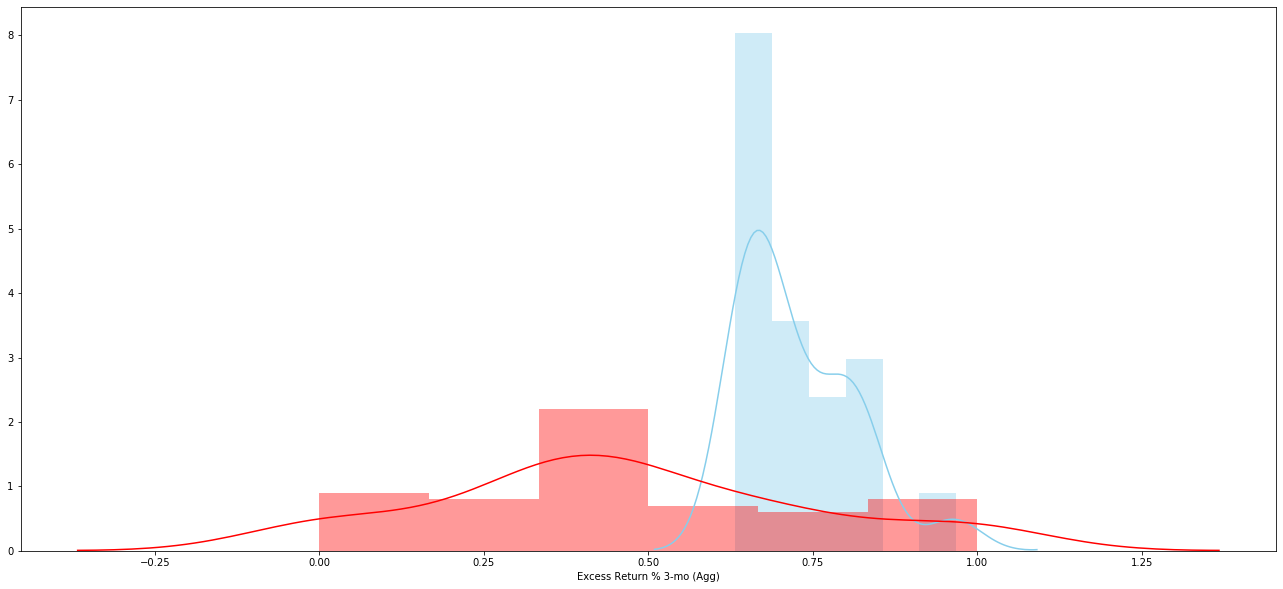

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 6-mo (Treasury)   60.0  0.459782  0.307265  0.039668   
 2                         combined  120.0  0.593072  0.261776  0.023897   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.380407  0.539157  
 2   0.545754  0.640390  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2666
 1                              Degrees of freedom =   118.0000
 2                                               t =     6.4630
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1800
 7                                       Hedge's g =     1.1725
 8           

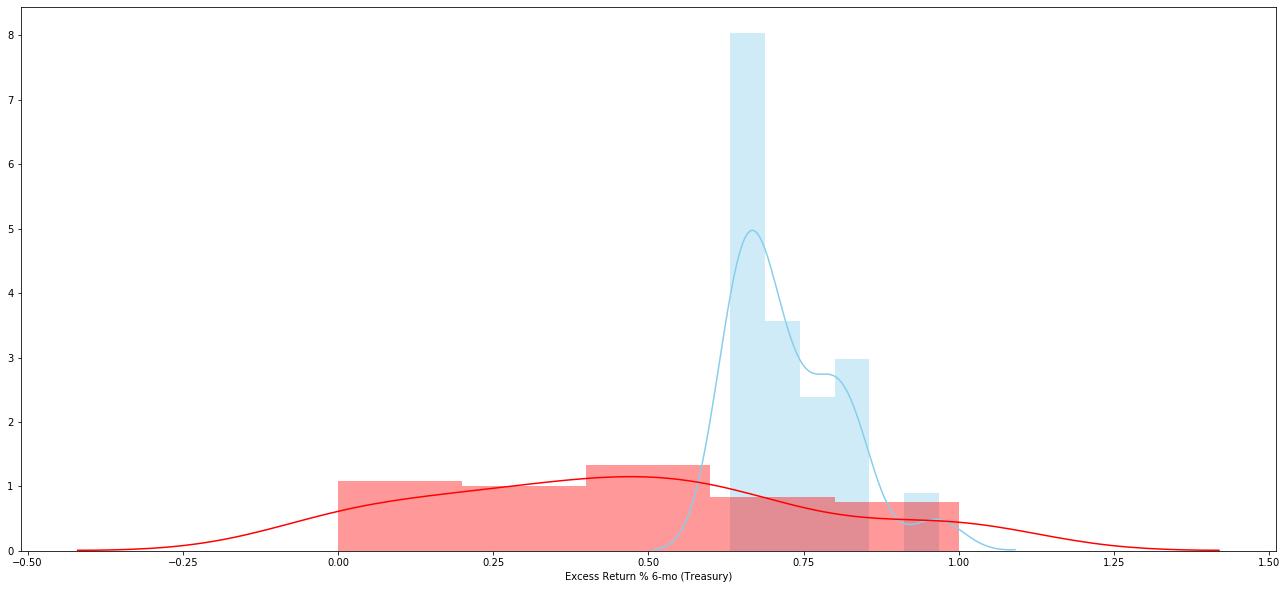

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   60.0  0.726363  0.087563  0.011304   0.703743   
 1  Excess Return % 6-mo (Agg)   60.0  0.446456  0.298437  0.038528   0.369362   
 2                    combined  120.0  0.586410  0.260213  0.023754   0.539374   
 
    Interval  
 0  0.748983  
 1  0.523551  
 2  0.633445  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2799
 1                             Degrees of freedom =   118.0000
 2                                              t =     6.9711
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2728
 7                                      Hedge's g =     1.2646
 8                                  Glass'

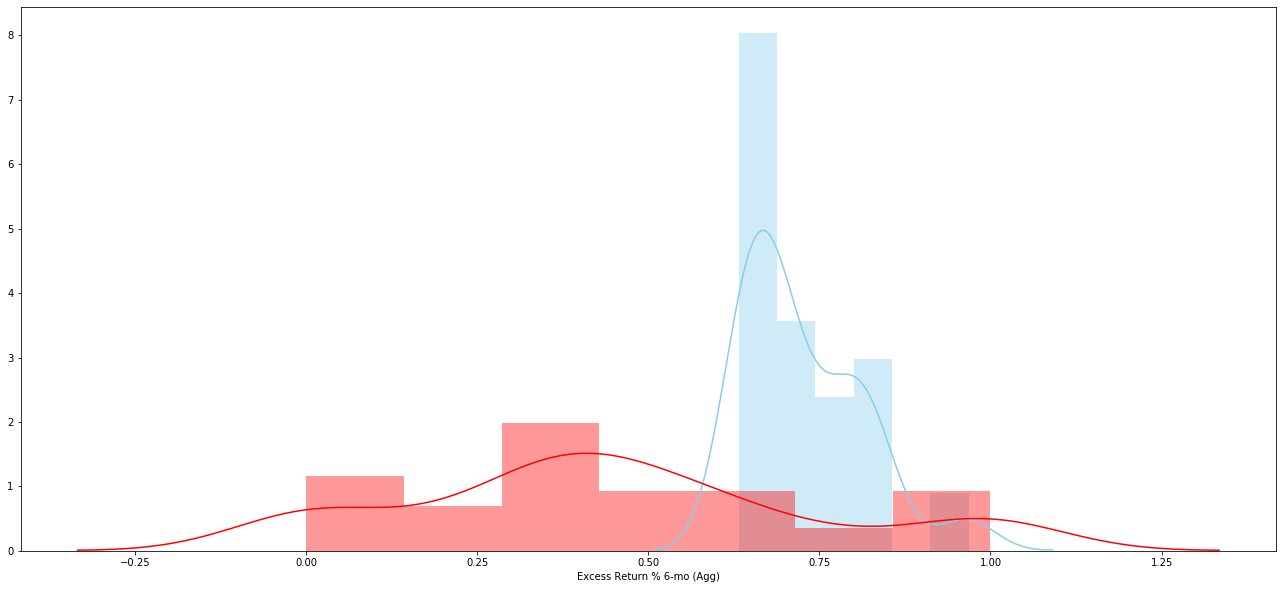

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 9-mo (Treasury)   60.0  0.468864  0.287572  0.037125   
 2                         combined  120.0  0.597613  0.248030  0.022642   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.394576  0.543152  
 2   0.552780  0.642447  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2575
 1                              Degrees of freedom =   118.0000
 2                                               t =     6.6352
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2114
 7                                       Hedge's g =     1.2037
 8           

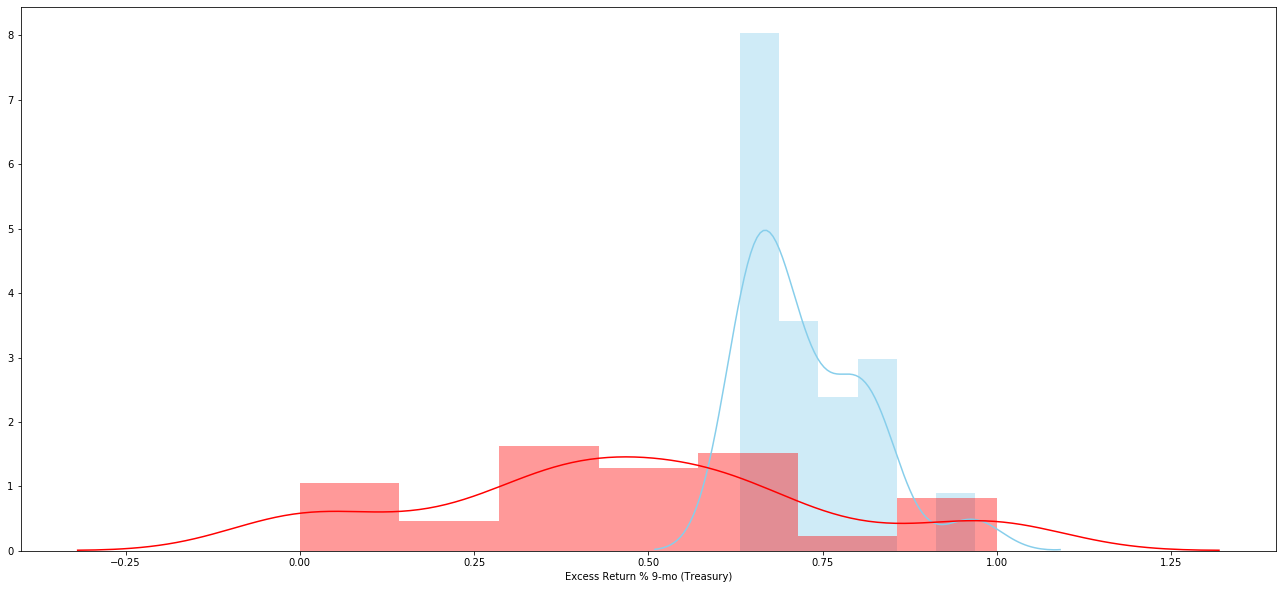

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   60.0  0.726363  0.087563  0.011304   0.703743   
 1  Excess Return % 9-mo (Agg)   60.0  0.453503  0.280598  0.036225   0.381017   
 2                    combined  120.0  0.589933  0.248209  0.022658   0.545067   
 
    Interval  
 0  0.748983  
 1  0.525989  
 2  0.634799  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2729
 1                             Degrees of freedom =   118.0000
 2                                              t =     7.1904
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3128
 7                                      Hedge's g =     1.3044
 8                                  Glass'

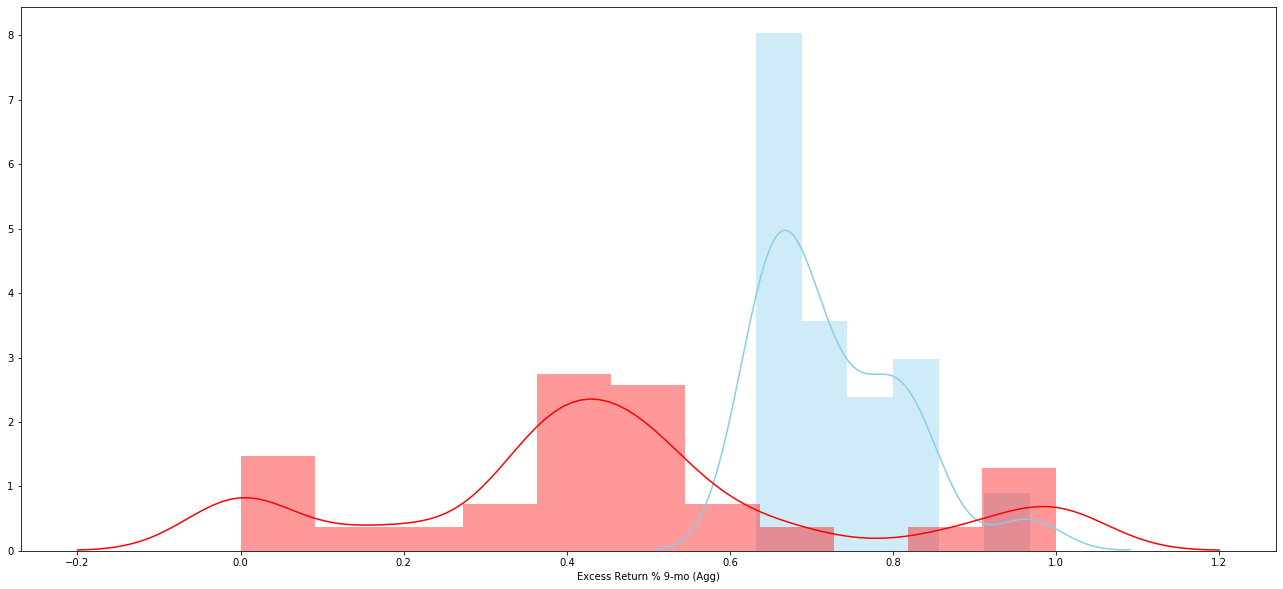

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 12-mo (Treasury)   60.0  0.472639  0.274206  0.035400   
 2                          combined  120.0  0.599501  0.239393  0.021854   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.401804  0.543474  
 2   0.556229  0.642773  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2537
 1                              Degrees of freedom =   118.0000
 2                                               t =     6.8277
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2466
 7                                       Hedge's g =     1.2386
 8       

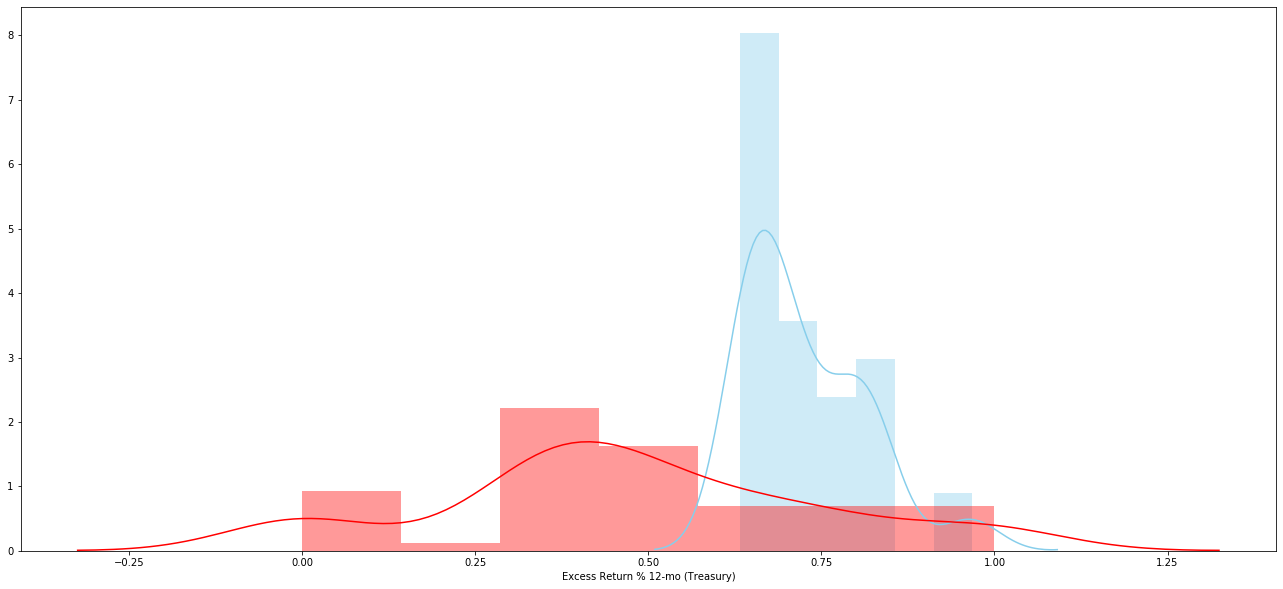

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 12-mo (Agg)   60.0  0.468094  0.276618  0.035711   
 2                     combined  120.0  0.597228  0.241981  0.022090   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.396636  0.539552  
 2   0.553489  0.640968  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2583
 1                              Degrees of freedom =   118.0000
 2                                               t =     6.8950
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2588
 7                                       Hedge's g =     1.2508
 8                           

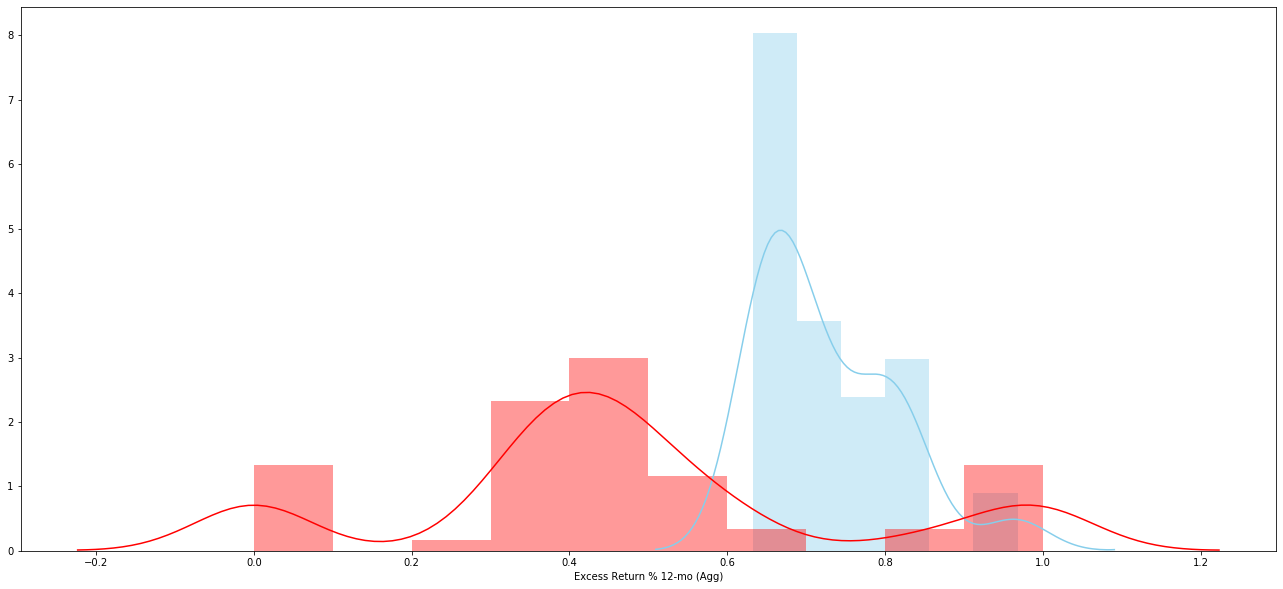

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 24-mo (Treasury)   60.0  0.468662  0.248151  0.032036   
 2                          combined  120.0  0.597512  0.225996  0.020631   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.404557  0.532766  
 2   0.556662  0.638363  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2577
 1                              Degrees of freedom =   118.0000
 2                                               t =     7.5857
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3849
 7                                       Hedge's g =     1.3761
 8       

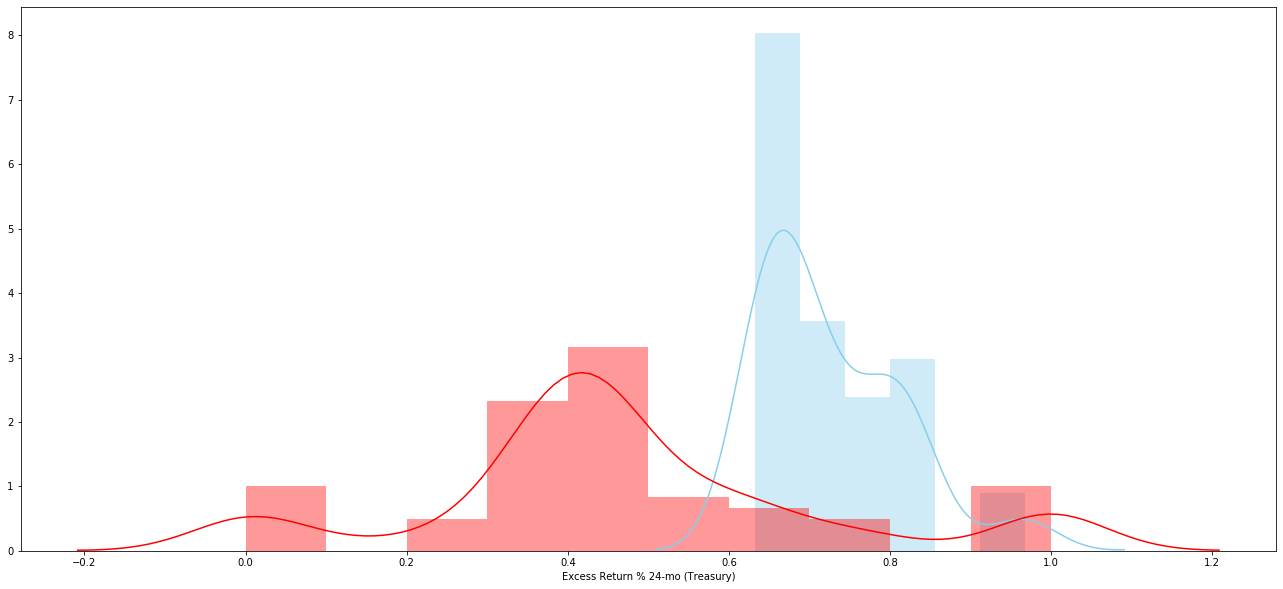

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 24-mo (Agg)   60.0  0.458421  0.247743  0.031984   
 2                     combined  120.0  0.592392  0.228760  0.020883   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.394422  0.522419  
 2   0.551042  0.633742  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2679
 1                              Degrees of freedom =   118.0000
 2                                               t =     7.8987
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4421
 7                                       Hedge's g =     1.4329
 8                           

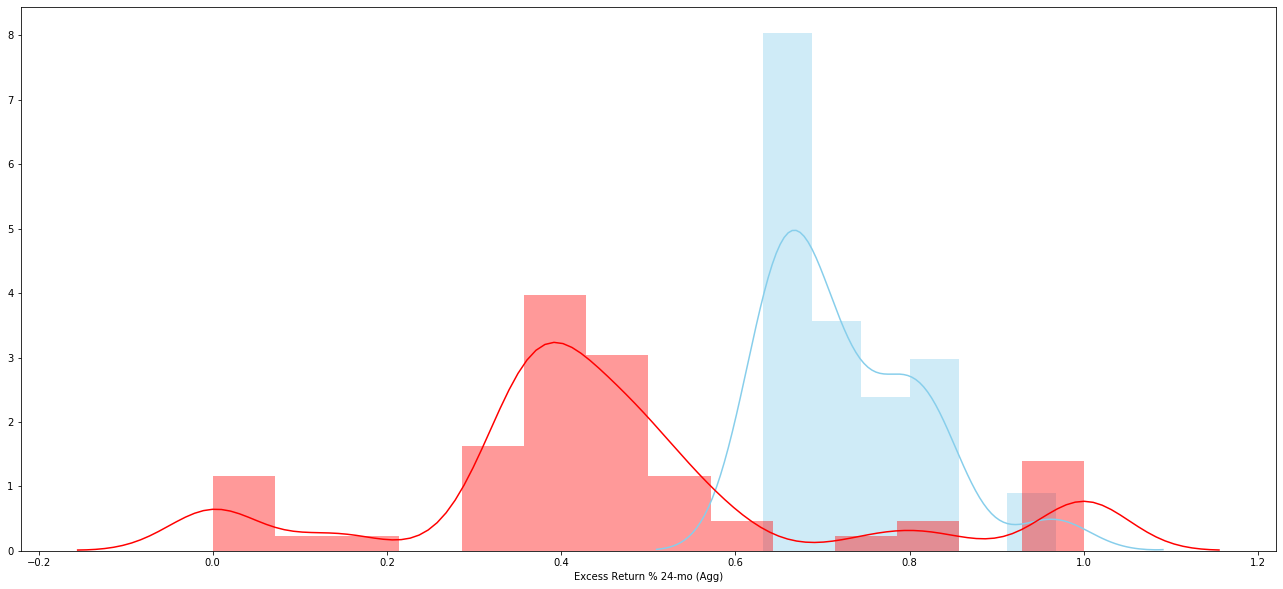

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 36-mo (Treasury)   60.0  0.480487  0.190650  0.024613   
 2                          combined  120.0  0.603425  0.192518  0.017574   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.431237  0.529737  
 2   0.568626  0.638224  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2459
 1                              Degrees of freedom =   118.0000
 2                                               t =     9.0781
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6574
 7                                       Hedge's g =     1.6469
 8       

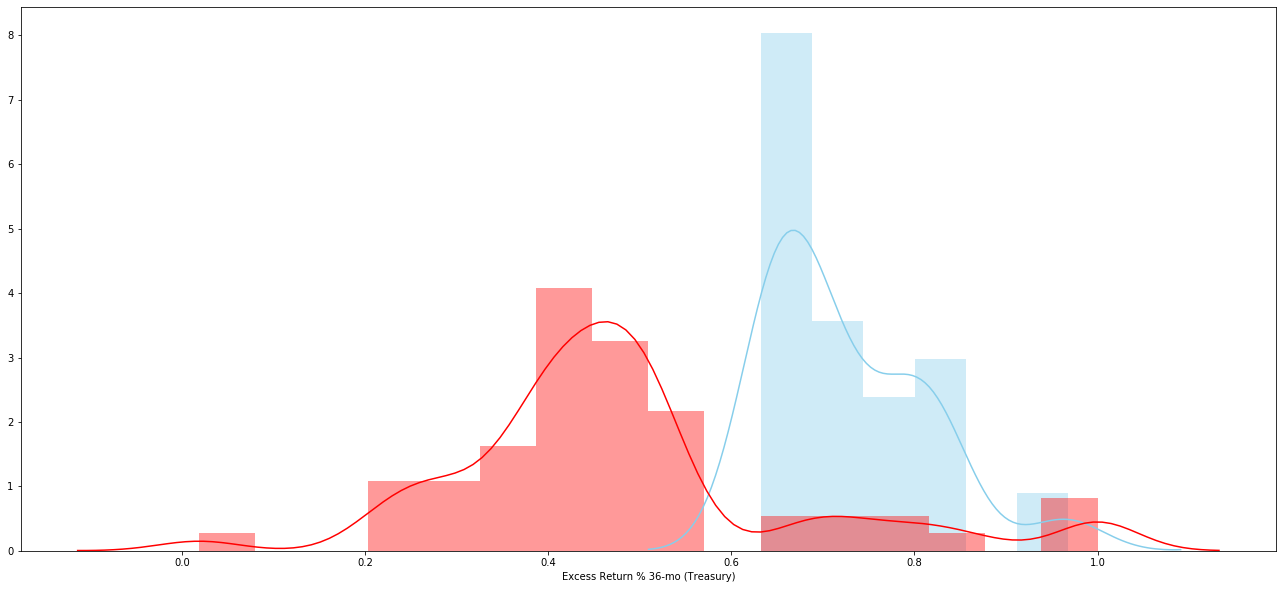

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 36-mo (Agg)   60.0  0.477430  0.188811  0.024375   
 2                     combined  120.0  0.601896  0.192610  0.017583   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.428655  0.526205  
 2   0.567081  0.636712  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2489
 1                              Degrees of freedom =   118.0000
 2                                               t =     9.2647
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6915
 7                                       Hedge's g =     1.6807
 8                           

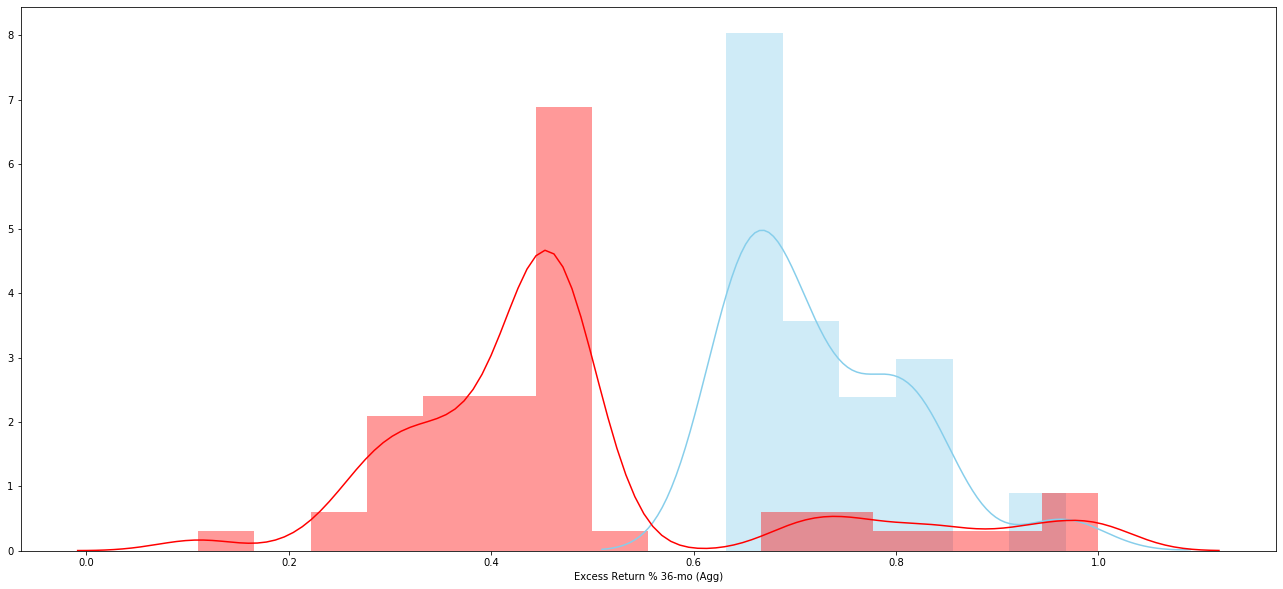

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_FRPS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.499596,0.497619,0.498871,0.486959,0.491705,0.485184,0.488772,0.494764,0.495848,0.487819,0.497761,0.473469,0.482113,0.462641,0.461482,2.55914
std,0.199647,0.223015,0.227708,0.233621,0.234617,0.232990,0.235452,0.231428,0.236072,0.225139,0.229379,0.231109,0.227496,0.227934,0.220252,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.371684,0.374153,0.374529,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.515250,0.507964,0.511728,0.514152,0.507158,0.507324,0.513215,0.510664,0.510860,0.502246,0.500336,0.479800,0.491677,0.482190,0.470409,3.00000
75%,0.623067,0.623599,0.623407,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 3-mo (Treasury)  278.0  0.486959  0.233621  0.014012   
 2                         combined  338.0  0.529456  0.233659  0.012709   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.459376  0.514541  
 2   0.504457  0.554456  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2394
 1                              Degrees of freedom =   336.0000
 2                                               t =     7.8125
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1121
 7                                       Hedge's g =     1.1096
 8           

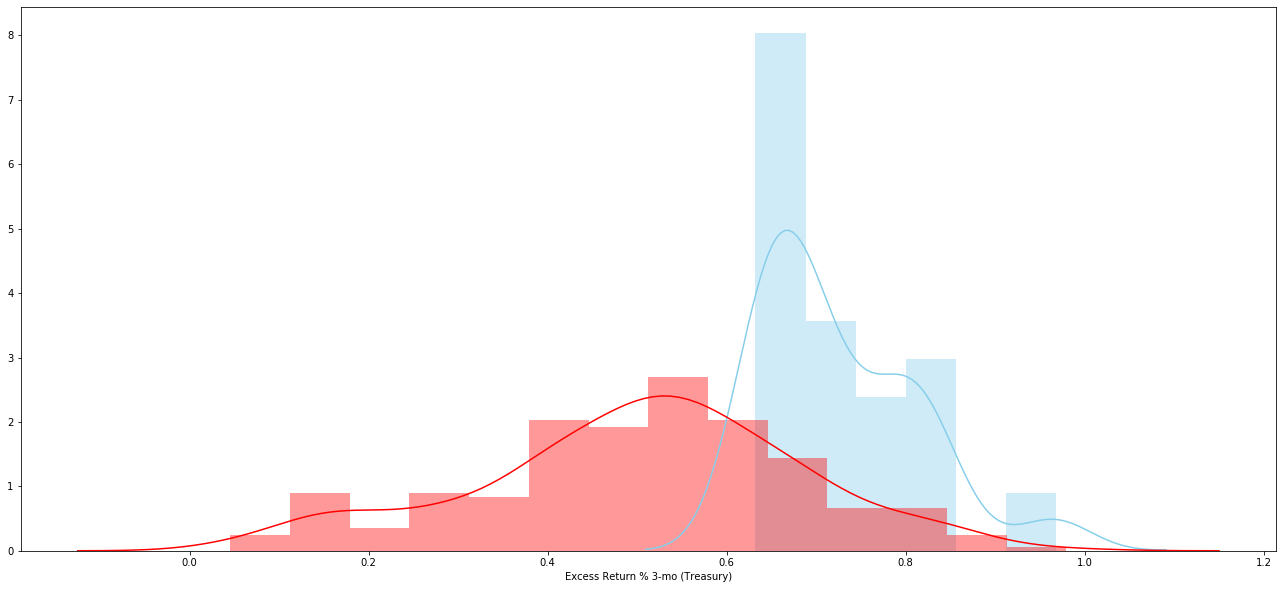

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   60.0  0.726363  0.087563  0.011304   0.703743   
 1  Excess Return % 3-mo (Agg)  278.0  0.491705  0.234617  0.014071   0.464004   
 2                    combined  338.0  0.533360  0.233775  0.012716   0.508348   
 
    Interval  
 0  0.748983  
 1  0.519405  
 2  0.558372  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2347
 1                             Degrees of freedom =   336.0000
 2                                              t =     7.6260
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0856
 7                                      Hedge's g =     1.0831
 8                                  Glass'

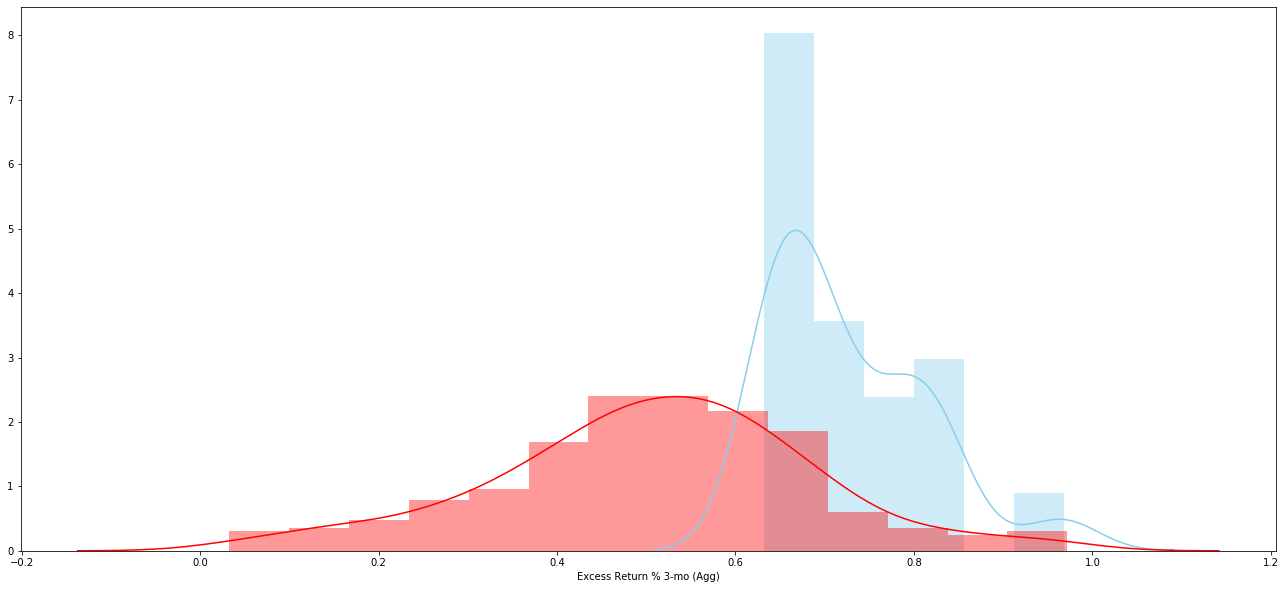

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 6-mo (Treasury)  275.0  0.485184  0.232990  0.014050   
 2                         combined  335.0  0.528380  0.233377  0.012751   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.457525  0.512843  
 2   0.503298  0.553462  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2412
 1                              Degrees of freedom =   333.0000
 2                                               t =     7.8897
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1242
 7                                       Hedge's g =     1.1217
 8           

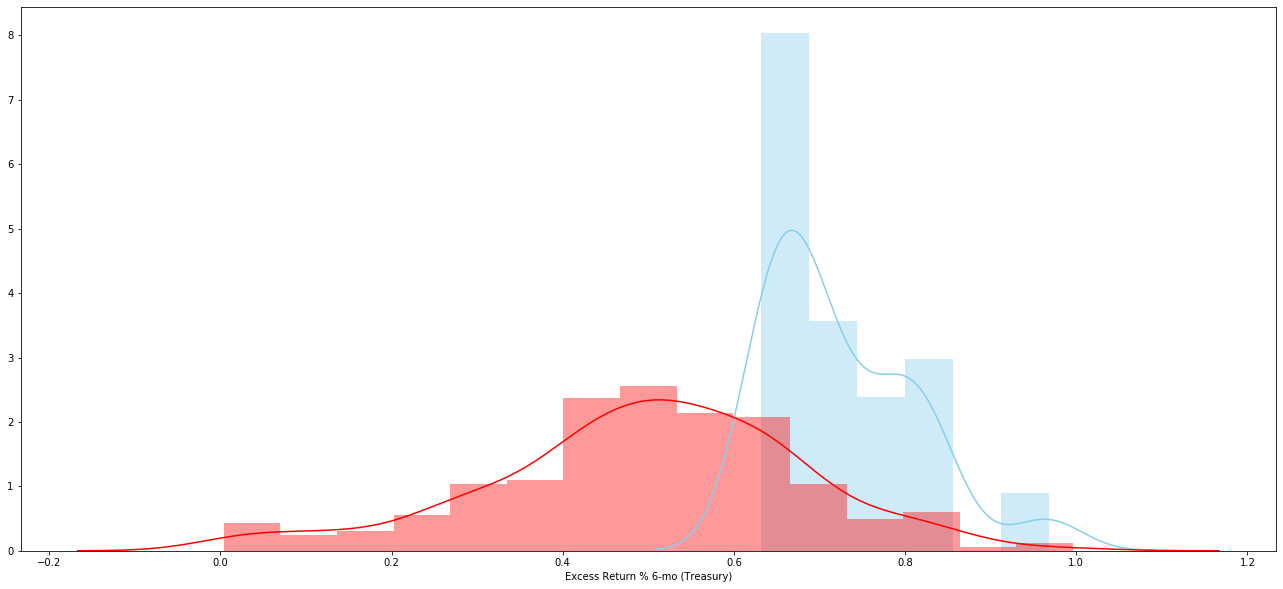

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   60.0  0.726363  0.087563  0.011304   0.703743   
 1  Excess Return % 6-mo (Agg)  275.0  0.488772  0.235452  0.014198   0.460820   
 2                    combined  335.0  0.531325  0.234857  0.012832   0.506084   
 
    Interval  
 0  0.748983  
 1  0.516723  
 2  0.556566  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2376
 1                             Degrees of freedom =   333.0000
 2                                              t =     7.6935
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0962
 7                                      Hedge's g =     1.0938
 8                                  Glass'

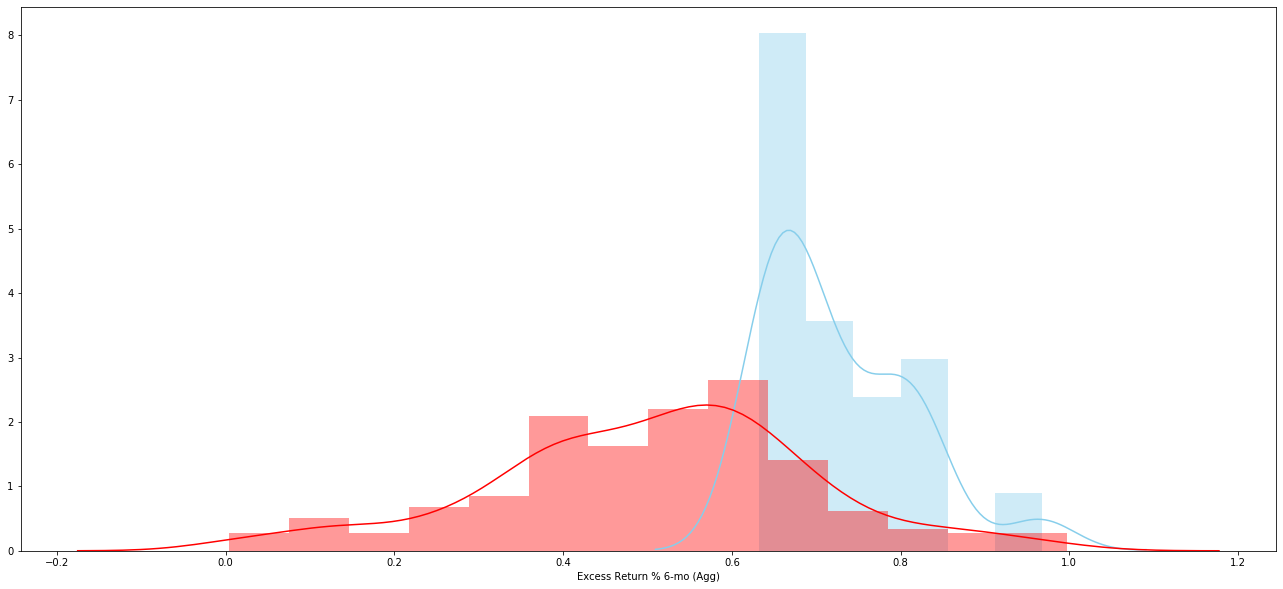

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 9-mo (Treasury)  272.0  0.494764  0.231428  0.014032   
 2                         combined  332.0  0.536619  0.230614  0.012657   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.467138  0.522390  
 2   0.511722  0.561517  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2316
 1                              Degrees of freedom =   330.0000
 2                                               t =     7.6247
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0875
 7                                       Hedge's g =     1.0850
 8           

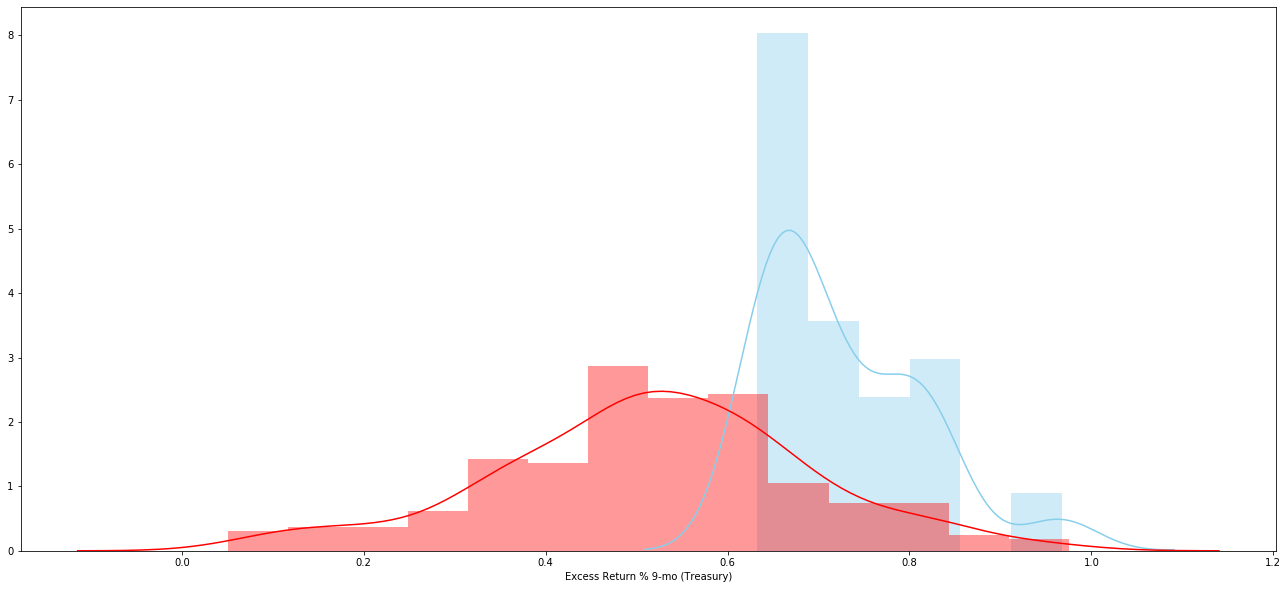

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   60.0  0.726363  0.087563  0.011304   0.703743   
 1  Excess Return % 9-mo (Agg)  272.0  0.495848  0.236072  0.014314   0.467668   
 2                    combined  332.0  0.537508  0.234277  0.012858   0.512215   
 
    Interval  
 0  0.748983  
 1  0.524029  
 2  0.562801  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2305
 1                             Degrees of freedom =   330.0000
 2                                              t =     7.4441
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0617
 7                                      Hedge's g =     1.0593
 8                                  Glass'

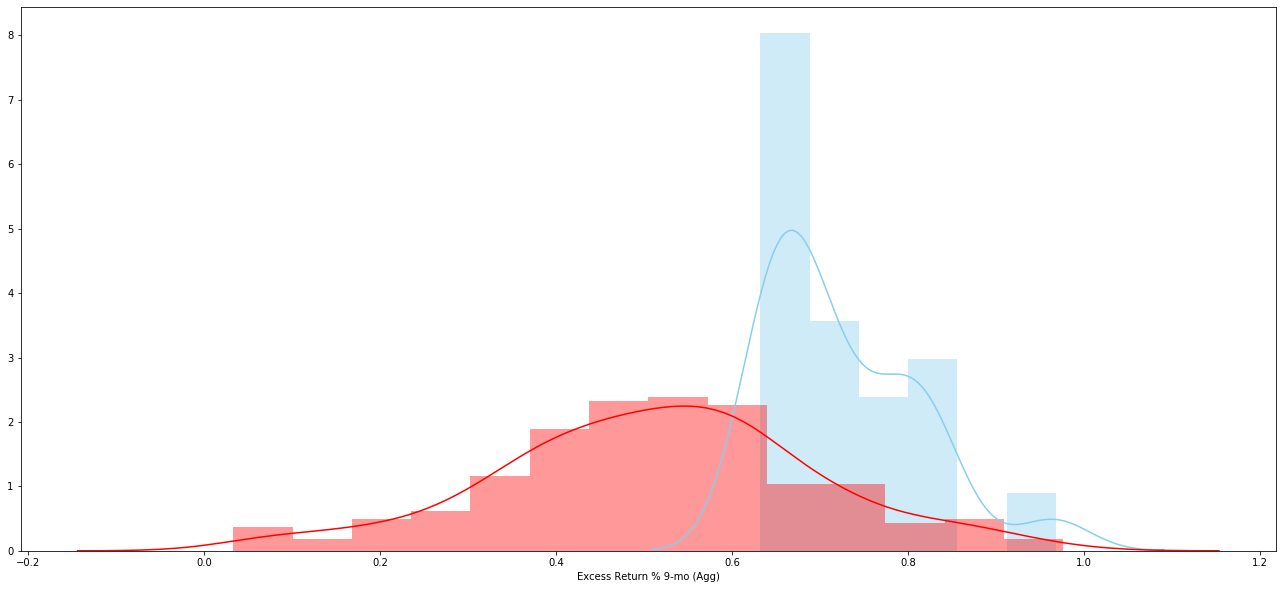

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 12-mo (Treasury)  269.0  0.487819  0.225139  0.013727   
 2                          combined  329.0  0.531323  0.226507  0.012488   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.460793  0.514846  
 2   0.506757  0.555889  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2385
 1                              Degrees of freedom =   327.0000
 2                                               t =     8.0643
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1514
 7                                       Hedge's g =     1.1487
 8       

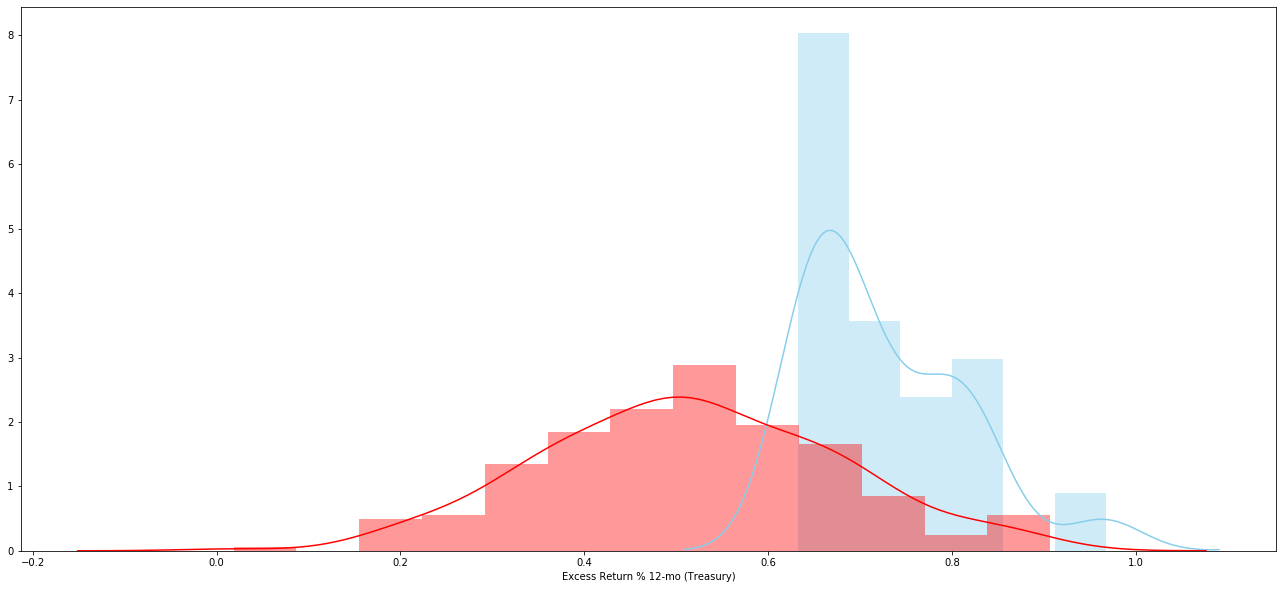

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 12-mo (Agg)  269.0  0.497761  0.229379  0.013985   
 2                     combined  329.0  0.539452  0.228441  0.012594   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.470226  0.525297  
 2   0.514676  0.564228  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2286
 1                              Degrees of freedom =   327.0000
 2                                               t =     7.5898
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0836
 7                                       Hedge's g =     1.0811
 8                           

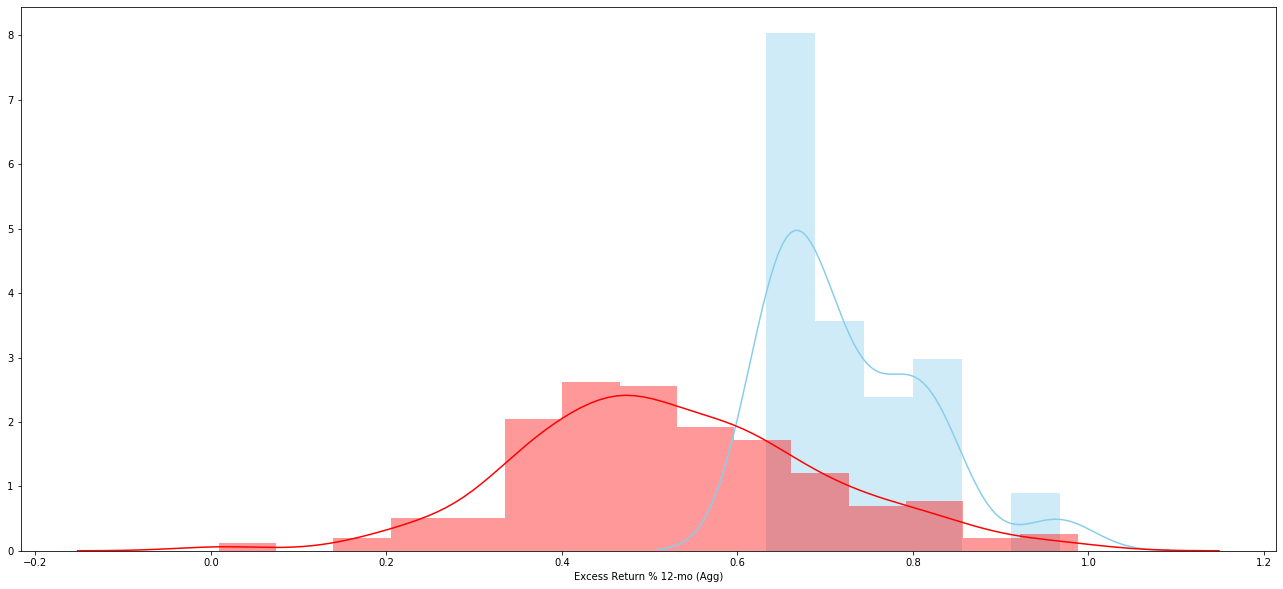

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 24-mo (Treasury)  257.0  0.473469  0.231109  0.014416   
 2                          combined  317.0  0.521336  0.233552  0.013118   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.445080  0.501859  
 2   0.495527  0.547144  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2529
 1                              Degrees of freedom =   315.0000
 2                                               t =     8.3292
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1942
 7                                       Hedge's g =     1.1914
 8       

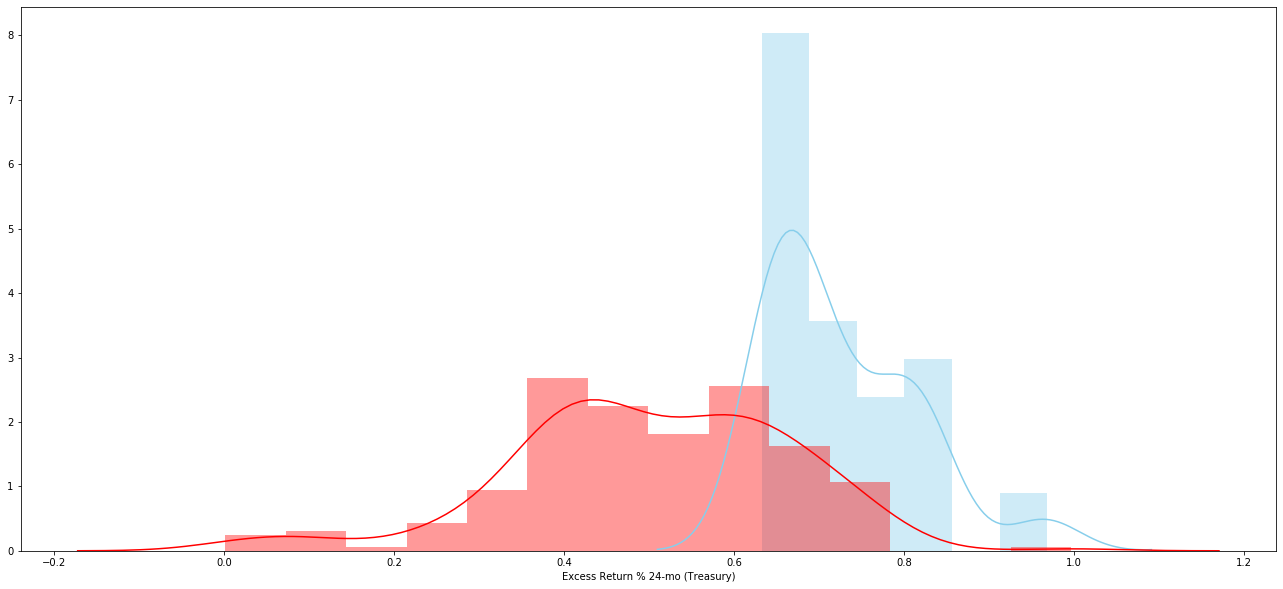

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 24-mo (Agg)  257.0  0.482113  0.227496  0.014191   
 2                     combined  317.0  0.528343  0.229222  0.012874   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.454167  0.510059  
 2   0.503013  0.553674  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2443
 1                              Degrees of freedom =   315.0000
 2                                               t =     8.1681
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1711
 7                                       Hedge's g =     1.1683
 8                           

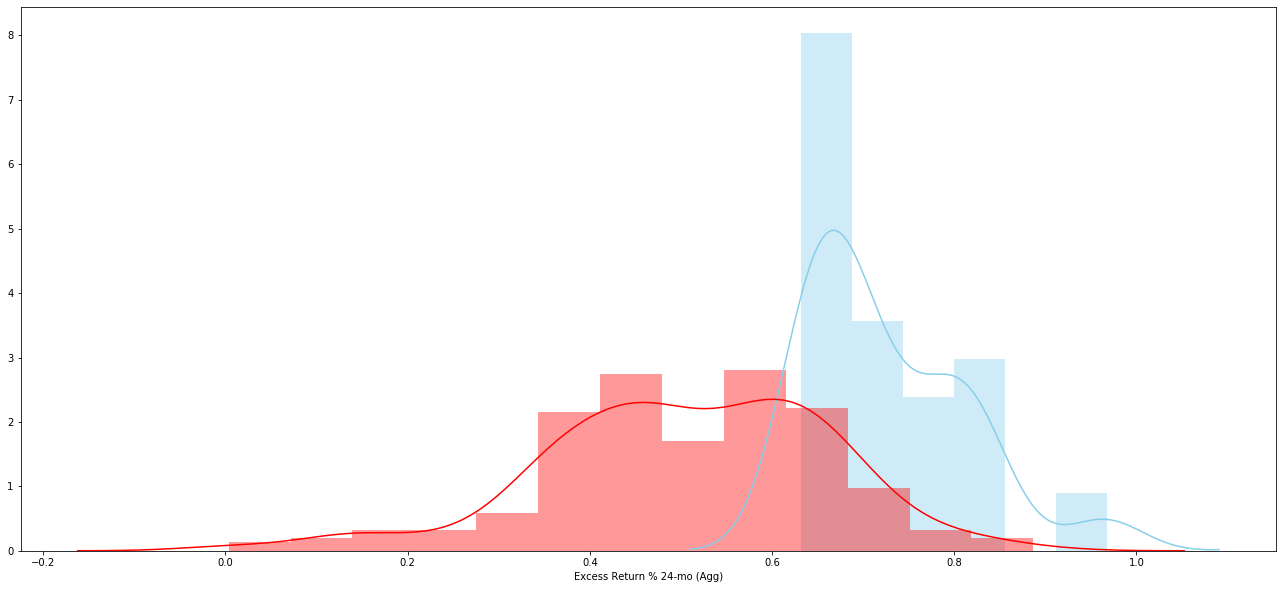

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 36-mo (Treasury)  245.0  0.462641  0.227934  0.014562   
 2                          combined  305.0  0.514520  0.232840  0.013332   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.433957  0.491324  
 2   0.488285  0.540756  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2637
 1                              Degrees of freedom =   303.0000
 2                                               t =     8.7955
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2669
 7                                       Hedge's g =     1.2638
 8       

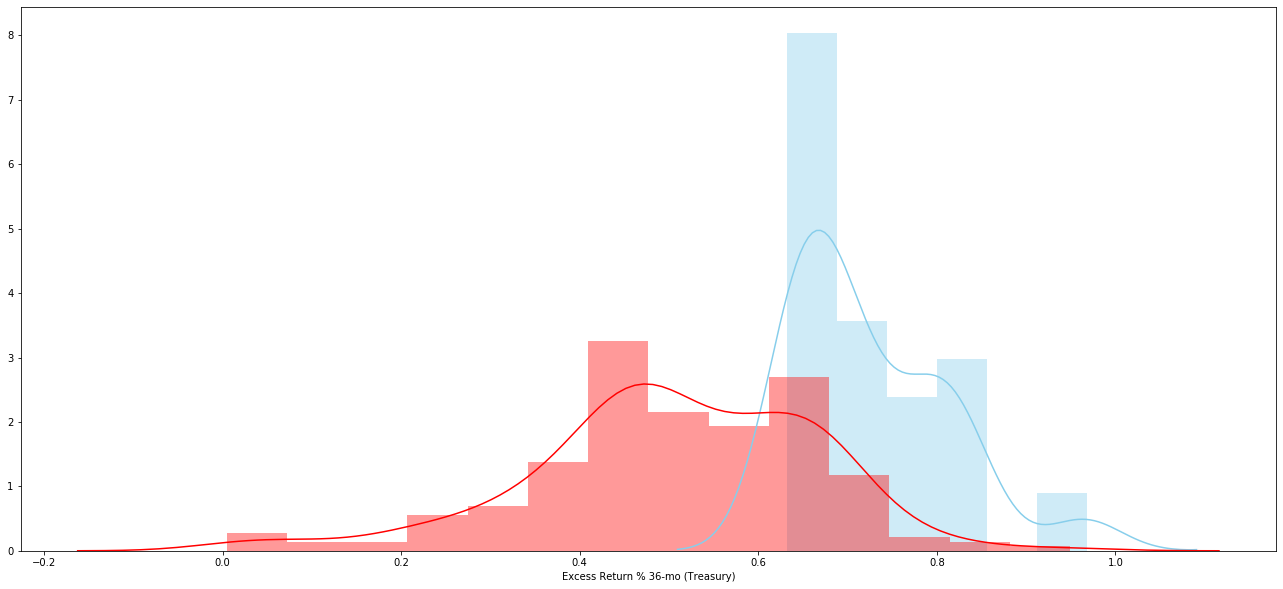

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   60.0  0.726363  0.087563  0.011304   
 1  Excess Return % 36-mo (Agg)  245.0  0.461482  0.220252  0.014071   
 2                     combined  305.0  0.513590  0.227042  0.013000   
 
    95% Conf.  Interval  
 0   0.703743  0.748983  
 1   0.433765  0.489199  
 2   0.488007  0.539172  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2649
 1                              Degrees of freedom =   303.0000
 2                                               t =     9.1311
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3153
 7                                       Hedge's g =     1.3120
 8                           

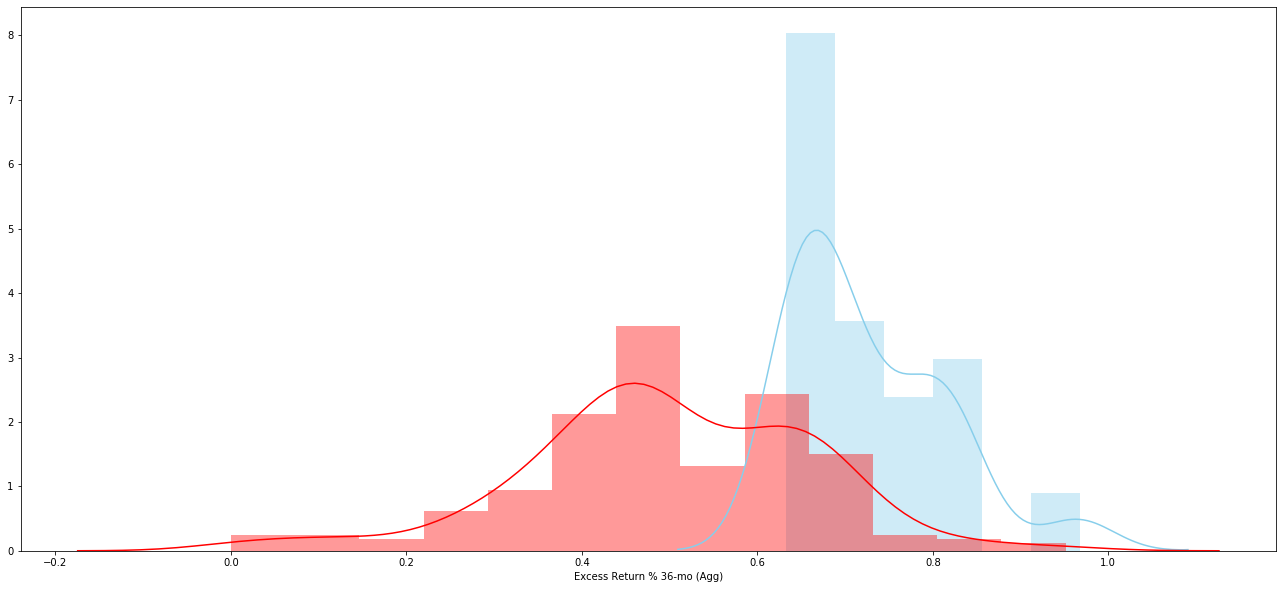

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")